# Basic KF Kalman filter

In this notebook, we'll implement a basic Kalman Filter for a one-dimensional constant velocity model. We'll estimate the position and velocity of an object moving along a straight line given noisy position measurements.

The Kalman Filter is an optimal recursive data processing algorithm. It estimates the state of a dynamic system from a series of incomplete and noisy measurements.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#  Simulation Parameters
dt = 1.0          # Time step (seconds)
t = np.arange(0, 20 + dt, dt)  # Time vector from 0 to 20 seconds
t

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [3]:
# Ground Truth
# True initial position and velocity
true_position = 0.0      # meters
true_velocity = 1.0      # meters/second

# Generate true position data
true_positions = true_position + true_velocity * t
true_positions

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [4]:
# Noisy Measurements
# Measurement noise standard deviation
measurement_noise_std = 2.0  # meters

# Generate noisy measurements
measurements = true_positions + np.random.normal(0, measurement_noise_std, size=t.shape)
measurements


array([-1.27090938,  0.08653487, -0.34302843,  3.87430958,  5.89044333,
        6.7611094 ,  5.97659382,  7.48754756, 11.06968758,  9.9224778 ,
        8.42261654,  9.62972758, 14.14793643, 15.65783417, 13.25423783,
       16.78970503, 15.83350962, 16.86518898, 17.7017755 , 20.64269058,
       20.24427098])

## Kalman Filter Parameters

### State transition matrix

The state transition matrix describes how the state of the system evolves from one time step to the next. In our case, the state is the position and velocity of the object. The state transition matrix is given by

Expanded:
[ position𝑘+1 ] = [1 𝑑𝑡] [position𝑘]
[ velocity𝑘+1 ]   [0 1] [velocity𝑘]

In [5]:
# State transition matrix
factor_for_current_position_to_next = 1
factor_for_current_velocity_to_next = 1
factor_for_the_position_to_the_next_velocity = 0
A = np.array(
    [
        [factor_for_current_position_to_next, dt],# dt is the time step
        [factor_for_the_position_to_the_next_velocity, factor_for_current_velocity_to_next]
    ]
)

Where the Order of the Elements Comes From
The arrangement of elements in the state transition matrix 
𝐴
A is systematic:

- Rows (Equations for Next State Variables):
    - First Row: Predicts the next position.
    - Second Row: Predicts the next velocity.
- Columns (Current State Variables):
    - First Column: Coefficients for the current position.
    - Second Column: Coefficients for the current velocity.

This layout ensures that when you perform the matrix multiplication 

### Observation matrix

In [6]:
# Factors in the observation matrix
factor_for_position_to_measurement = 1
factor_for_velocity_to_measurement = 0

# Observation matrix
H = np.array([[factor_for_position_to_measurement, factor_for_velocity_to_measurement]])


In [7]:

# Process noise covariance matrix
process_noise_std = 1e-5
Q = process_noise_std * np.array([[dt**4/4, dt**3/2],
                                  [dt**3/2, dt**2]])

# Measurement noise covariance
R = np.array([[measurement_noise_std**2]])

# Initial state estimate
x_est = np.array([[0],
                  [0]])  # Start with zero position and velocity

# Initial covariance estimate
P = np.eye(2) * 500  # Large initial uncertainty


## Storage for estimates

In [8]:
# Lists to store estimates
estimated_positions = []
estimated_velocities = []
position_uncertainties = []
velocity_uncertainties = []


## Kalman Filter Algorithm

In [9]:
for idx in range(len(t)):
    # Prediction Step
    x_pred = A @ x_est
    P_pred = A @ P @ A.T + Q

    # Measurement Update Step
    z = measurements[idx]
    y = z - (H @ x_pred)  # Measurement residual
    S = H @ P_pred @ H.T + R  # Residual covariance
    K = P_pred @ H.T @ np.linalg.inv(S)  # Kalman gain

    x_est = x_pred + K @ y
    P = (np.eye(2) - K @ H) @ P_pred

    # Store estimates and uncertainties
    estimated_positions.append(x_est[0, 0])
    estimated_velocities.append(x_est[1, 0])
    position_uncertainties.append(P[0, 0])
    velocity_uncertainties.append(P[1, 1])


## Plot the results

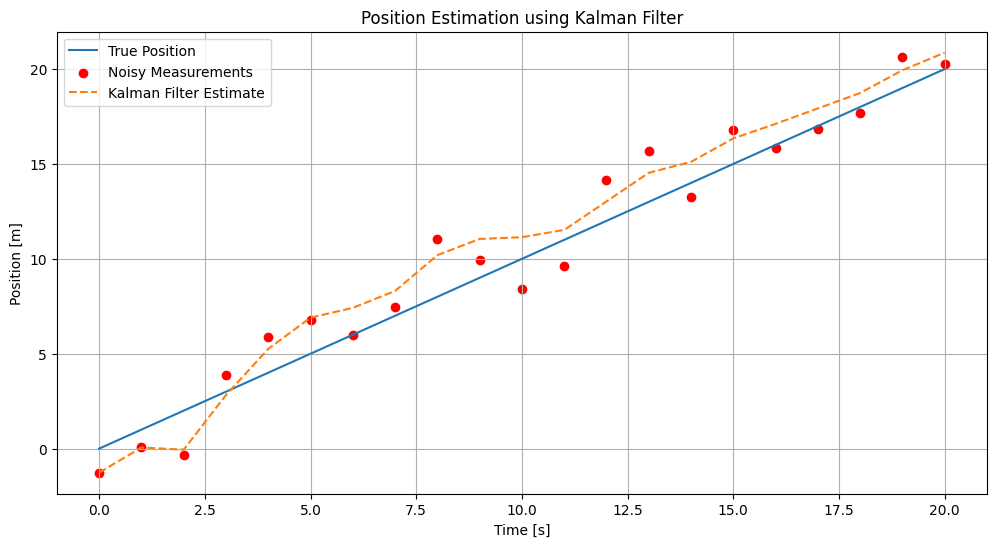

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(t, true_positions, label='True Position')
plt.scatter(t, measurements, color='red', label='Noisy Measurements', marker='o')
plt.plot(t, estimated_positions, label='Kalman Filter Estimate', linestyle='--')
plt.title('Position Estimation using Kalman Filter')
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.legend()
plt.grid(True)
plt.show()


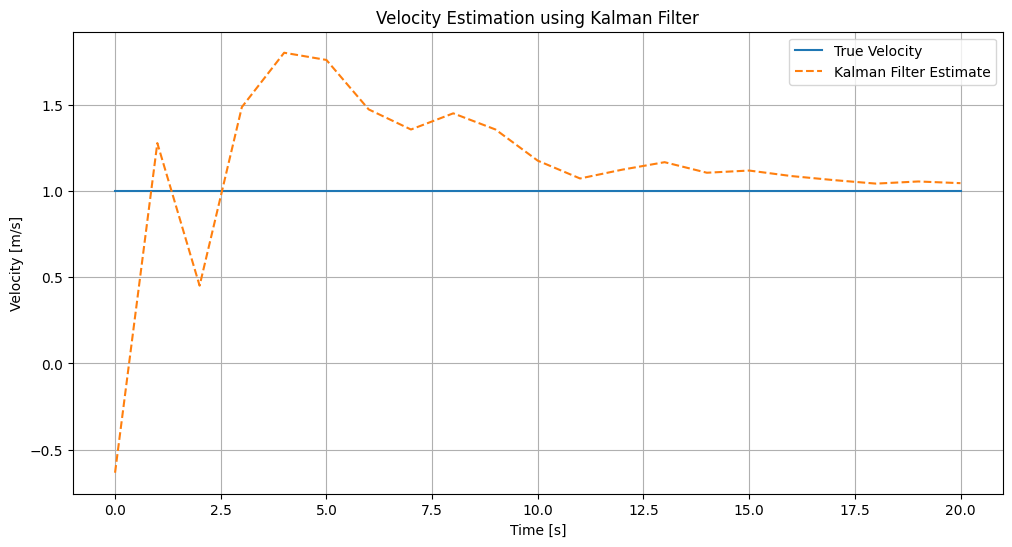

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(t, [true_velocity]*len(t), label='True Velocity')
plt.plot(t, estimated_velocities, label='Kalman Filter Estimate', linestyle='--')
plt.title('Velocity Estimation using Kalman Filter')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.legend()
plt.grid(True)
plt.show()


for idx in range(len(t)):
    # Prediction Step
    x_pred = A @ x_est
    P_pred = A @ P @ A.T + Q

    # Measurement Update Step
    z = measurements[idx]
    y = z - (H @ x_pred)  # Measurement residual
    S = H @ P_pred @ H.T + R  # Residual covariance
    K = P_pred @ H.T @ np.linalg.inv(S)  # Kalman gain

    x_est = x_pred + K @ y
    P = (np.eye(2) - K @ H) @ P_pred

    # Store estimates and uncertainties
    estimated_positions.append(x_est[0, 0])
    estimated_velocities.append(x_est[1, 0])
    position_uncertainties.append(P[0, 0])
    velocity_uncertainties.append(P[1, 1])
